# KNN K-Nearest-Neighbor
K-Nearest-Neighbor es un algoritmo basado en instancia de tipo supervisado de Machine Learning. Puede usarse para clasificar nuevas muestras (valores discretos) o para predecir (regresión, valores continuos). Al ser un método sencillo, es ideal para introducirse en el mundo del  Aprendizaje Automático. Sirve esencialmente para clasificar valores buscando los puntos de datos “más similares” (por cercanía) aprendidos en la etapa de entrenamiento y haciendo conjeturas de nuevos puntos basado en esa clasificación.

## Funcionamiento

Es un método que simplemente busca en las observaciones más cercanas a la que se está tratando de predecir y clasifica el punto de interés basado en la mayoría de datos que le rodean. Como dijimos antes, es un algoritmo:
- Supervisado: esto -brevemente- quiere decir que tenemos etiquetado nuestro conjunto de datos de entrenamiento, con la clase o resultado esperado dada “una fila” de datos.
- Basado en Instancia: Esto quiere decir que nuestro algoritmo no aprende explícitamente un modelo (como por ejemplo en Regresión Logística o árboles de decisión). En cambio memoriza las instancias de entrenamiento que son usadas como “base de conocimiento” para la fase de predicción.


1. Calcular la distancia entre el item a clasificar y el resto de items del dataset de entrenamiento.
2. Seleccionar los “k” elementos más cercanos (con menor distancia, según la función que se use)
3. Realizar una “votación de mayoría” entre los k puntos: los de una clase/etiqueta que <<dominen>> decidirán su clasificación final.

## Anatomía del algoritmo KNN
1. Identificación de vecinos: KNN identifica "k" vecinos más cercanos a un punto de consulta en función de su proximidad.
2. Una decisión por mayoría: predice mediante un voto mayoritario entre los vecinos para la clasificación o el promedio para la regresión.
3. Sin fase de entrenamiento explícita: el aprendizaje perezoso de KNN significa que no hay entrenamiento explícito; almacena todo el conjunto de datos para la inferencia.
4. Impacto del valor k: el parámetro k influye en la complejidad del modelo y puede afectar el sobreajuste o el subajuste.

## Métricas de distancia
Cada métrica de distancia proporciona una perspectiva única para determinar la proximidad y contribuye a establecer límites de decisión distintos dentro del algoritmo KNN.

Comprender sus características ayuda a seleccionar la métrica más adecuada para un conjunto de datos determinado.
### Distancia euclidiana (p=2)
La medida de distancia más común y sencilla, aplicable exclusivamente a vectores de valores reales.

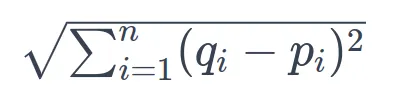

### Distancia de Manhattan (p=1)
Conocida a menudo como distancia de taxi o de manzana, esta métrica calcula el valor absoluto entre dos puntos.

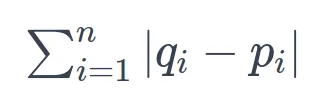

### Distancia de Minkowski
Una forma generalizada que abarca las distancias euclidianas y de Manhattan, lo que permite la creación de varias métricas de distancia basadas en el parámetro p.

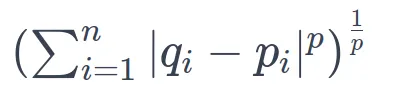

### Distancia de Hamming
Adaptada a vectores booleanos o de cadena, identifica discrepancias entre vectores. Comúnmente conocida como métrica de superposición.

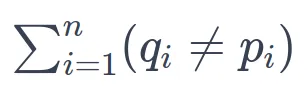

In [2]:
#Parte 1: Cálculo de la distancia
def euclidean_distance(point1, point2):
    """
    Calculate the Euclidean distance between two points.

    Parameters:
    point1 : list or array-like
        Coordinates of the first point.
    point2 : list or array-like
        Coordinates of the second point.

    Returns:
    distance : float
        The Euclidean distance between the two points.
    """
    # Ensure both points have the same dimensions
    assert len(point1) == len(point2), "Points should have the same dimensions."
    
    # Compute the Euclidean distance
    distance = sum((p1 - p2) ** 2 for p1, p2 in zip(point1, point2)) ** 0.5
    return distance

In [3]:
#Parte 2: Encontrar vecinos más cercanos
def find_neighbors(X_train, query_point, k):
    """
    Find the 'k' nearest neighbors of a query point within a dataset.

    Parameters:
    X_train : list or array-like
        Training dataset containing features.
    query_point : list or array-like
        Coordinates of the query point.
    k : int
        Number of neighbors to find.

    Returns:
    neighbors : list
        List of indices of the 'k' nearest neighbors.
    """
    distances = []
    
    # Calculate distance from the query point to each point in the training set
    for i, data_point in enumerate(X_train):
        distance = euclidean_distance(query_point, data_point)
        distances.append((i, distance))
    
    # Sort distances in ascending order
    distances.sort(key=lambda x: x[1])
    
    # Get indices of the 'k' nearest neighbors
    neighbors = [index for index, _ in distances[:k]]
    return neighbors

In [4]:
# Parte 3: Predicción de la clase
def predict(X_train, y_train, query_point, k):
    """
    Predict the class of a query point based on the majority class among its nearest neighbors.

    Parameters:
    X_train : list or array-like
        Training dataset containing features.
    y_train : list or array-like
        Training dataset containing labels.
    query_point : list or array-like
        Coordinates of the query point.
    k : int
        Number of neighbors to consider.

    Returns:
    predicted_class : int or str
        Predicted class label for the query point.
    """
    neighbors = find_neighbors(X_train, y_train, query_point, k)
    neighbor_labels = [y_train[i] for i in neighbors]
    
    # Count occurrences of each label among neighbors
    label_counts = {}
    for label in neighbor_labels:
        if label in label_counts:
            label_counts[label] += 1
        else:
            label_counts[label] = 1
    
    # Get the label with the highest count
    predicted_class = max(label_counts, key=label_counts.get)
    return predicted_class

## Ejemplo de aplicación
El conjunto de datos de calidad del vino incluye 11 características como acidez, azúcar residual, pH y contenido de alcohol, con el objetivo de predecir la calidad del vino en una escala del 1 al 10. Con 4898 muestras, este conjunto de datos sirve como campo de juego para explorar técnicas de clasificación.

En esta fase, iniciamos nuestra exploración leyendo el conjunto de datos, dividiéndolo en conjuntos de entrenamiento y prueba, y aplicando un KNeighborsClassifier de scikit-learn con un valor k estático de 15.

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns


def read_data(file_name):
    # Load the dataset with semicolon delimiter
    data = pd.read_csv(file_name, delimiter=';')
    return data

def split_data(data):
    # Extract features and labels
    X = data.drop('quality', axis=1)
    y = data['quality']

    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(
        X,
        y,
        test_size=0.2,
        random_state=42
    )
    return X_train, X_test, y_train, y_test

def fit_model(X_train, y_train, k = 5):
    # Implement KNN classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    # Predict on the train set
    train_preds = knn.predict(X_train)

    # Calculate and return accuracy on train set
    train_accuracy = accuracy_score(y_train, train_preds)
    return train_accuracy, knn


def test_model(model, X_test, y_test):
    # Predict on the test set
    test_preds = model.predict(X_test)

    # Calculate and return accuracy on test set
    test_accuracy = accuracy_score(y_test, test_preds)
    return test_accuracy

### Optimización de KNN: ajuste del modelo


In [6]:
def find_best_k_with_grid_search(X_train, y_train, X_test, y_test, param_grid):
    # Create a KNN classifier
    knn = KNeighborsClassifier()

    # Perform GridSearchCV
    grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)

    # Get the best parameter
    best_k = grid_search.best_params_['n_neighbors']

    # Fit model with best k on entire training set
    best_knn = KNeighborsClassifier(n_neighbors=best_k)
    best_knn.fit(X_train, y_train)

    # Calculate accuracy on train and test set
    train_accuracy = best_knn.score(X_train, y_train)
    test_accuracy = best_knn.score(X_test, y_test)
    
    return grid_search.best_params_, train_accuracy, test_accuracy


# Assuming you have X_train, y_train variables
max_k=50

# Define a grid of hyperparameters
parameters = {'n_neighbors': range(2, max_k + 1)}

best_params, train_accuracy, test_accuracy = find_best_k_with_grid_search(X_train, y_train, X_test, y_test, parameters)
print(f"Best k: {best_params['n_neighbors']}")
print(f"Train Accuracy with Best k: {train_accuracy*100:.2f}%")
print(f"Test Accuracy with Best k: {test_accuracy*100:.2f}%")

NameError: name 'X_train' is not defined